In [152]:
import numpy as np
import pandas as pd
import random
import pickle
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score as r2, mean_absolute_error as mae, mean_squared_error as mse
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import accuracy_score

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [63]:
import warnings
warnings.filterwarnings('ignore')

In [64]:
matplotlib.rcParams.update({'font.size': 14})

In [150]:
def evaluate_preds(train_true_values,train_pred_values,test_true_values,test_pred_values):
    print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values), 3)))
    print("Test R2:\t" + str(round(r2(test_true_values, test_pred_values), 3)))
    
    plt.figure(figsize=(18,10))
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('True vs Predicted values')
    plt.show()

    plt.figure(figsize=(18,10))
    plt.subplot(122)
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('True vs Predicted values')
    plt.show()

In [166]:
DATA_TRAIN_PATH = r"C:\Users\1395366\Downloads\train (1).csv"
DATA_TEST_PATH = r"C:\Users\1395366\Downloads\test (2).csv"
RESULT_PATH='./predictions.csv'

In [162]:
df_train = pd.read_csv(DATA_TRAIN_PATH)
df_test = pd.read_csv(DATA_TEST_PATH)

In [68]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

Описание датасета
Id - идентификационный номер квартиры

DistrictID - идентификационный номер района

Rooms - количество комнат

Square - площадь

LifeSquare - жилая площадь

KitchenSquare - площадь кухни

Floor - этаж

HouseFloor - количество этажей в доме

HouseYear - год постройки дома

Ecology_1, Ecology_2, Ecology_3 - экологические показатели местности

Social_1, Social_2, Social_3 - социальные показатели местности

Healthcare_1, Helthcare_2 - показатели местности, связанные с ораной здоровья

Shops_1, Shops_2 - показатели, связанные с наичием магазинов, торговых центров

Price - цена квартиры

In [69]:
df_train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [70]:
df_train.head(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644
5,12915,59,3.0,80.384479,46.683720,12.0,5,17.0,2011,0.309479,B,B,35,7715,4,990.0,0,6,B,215898.447742
6,14549,154,2.0,62.254114,37.160377,7.0,3,5.0,1960,0.460556,B,B,20,4386,14,NaN,1,5,B,296021.204377
7,11993,74,2.0,80.312926,NaN,0.0,14,0.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,221244.156664
8,5172,1,2.0,64.511437,NaN,1.0,9,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,229102.795999
9,8649,23,1.0,46.461409,18.915552,8.0,13,17.0,2014,0.075779,B,B,6,1437,3,NaN,0,2,B,95380.220993


In [71]:
df_test.head(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A
5,7633,53,1.0,40.675627,NaN,1.0,21,21.0,1977,0.049637,B,B,34,7759,0,229.0,1,3,B
6,13329,23,2.0,68.099538,64.843025,1.0,2,17.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
7,5502,32,2.0,48.193897,32.857644,6.0,5,14.0,1972,0.135650,B,B,46,7960,6,350.0,3,11,B
8,4220,96,3.0,72.277106,45.968758,9.0,17,17.0,1997,0.041116,B,B,53,14892,4,NaN,1,4,B
9,11538,6,3.0,80.219400,47.660260,9.0,13,17.0,2014,0.243205,B,B,5,1564,0,540.0,0,0,B


In [72]:
#переведем DistrictId и Id в str
df_train['DistrictId'] = df_train['DistrictId'].astype(str)
df_train['Id'] = df_train['Id'].astype(str)

In [73]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  object 
 1   DistrictId     10000 non-null  object 
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

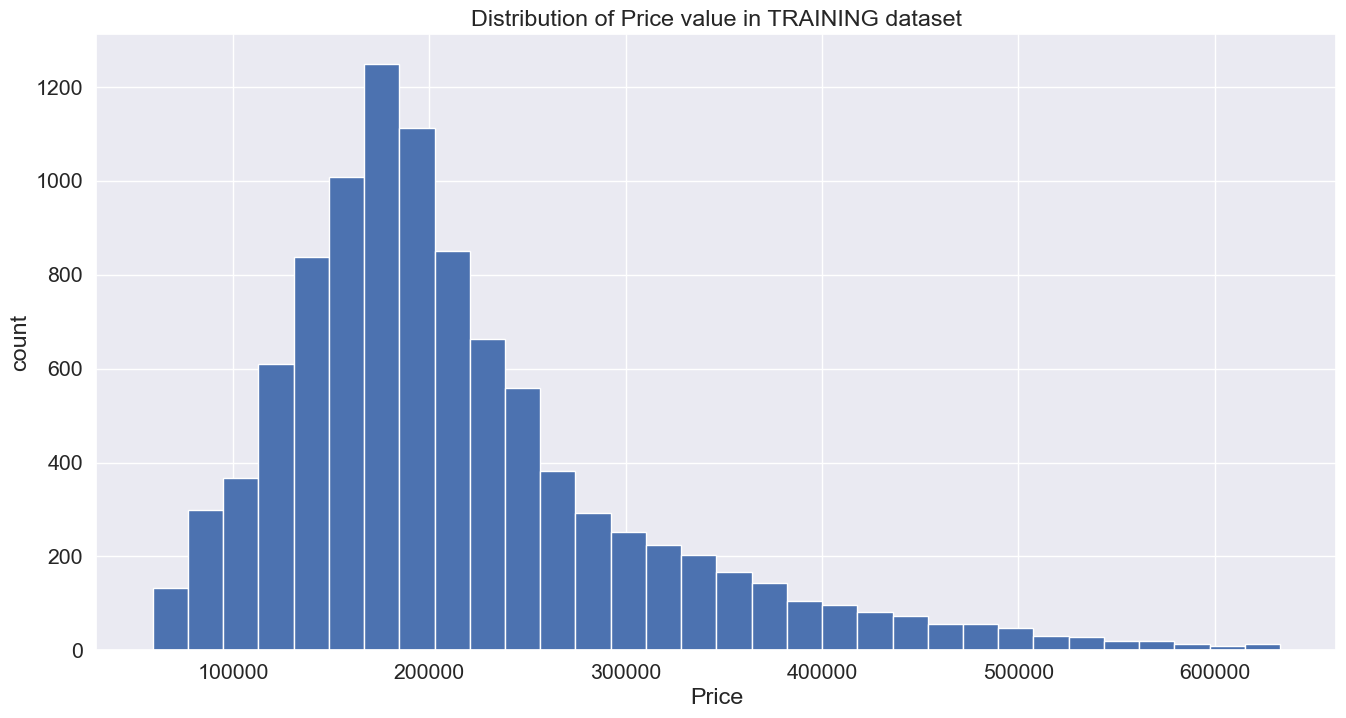

In [74]:
#распределение целевой переменной
plt.figure(figsize = (16, 8))

df_train['Price'].hist(bins=32)
plt.ylabel('count')
plt.xlabel('Price')

plt.title('Distribution of Price value in TRAINING dataset')
plt.show()

In [75]:
df_train.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


array([[<Axes: title={'center': 'Rooms'}>,
        <Axes: title={'center': 'Square'}>,
        <Axes: title={'center': 'LifeSquare'}>,
        <Axes: title={'center': 'KitchenSquare'}>],
       [<Axes: title={'center': 'Floor'}>,
        <Axes: title={'center': 'HouseFloor'}>,
        <Axes: title={'center': 'HouseYear'}>,
        <Axes: title={'center': 'Ecology_1'}>],
       [<Axes: title={'center': 'Social_1'}>,
        <Axes: title={'center': 'Social_2'}>,
        <Axes: title={'center': 'Social_3'}>,
        <Axes: title={'center': 'Healthcare_1'}>],
       [<Axes: title={'center': 'Helthcare_2'}>,
        <Axes: title={'center': 'Shops_1'}>,
        <Axes: title={'center': 'Price'}>, <Axes: >]], dtype=object)

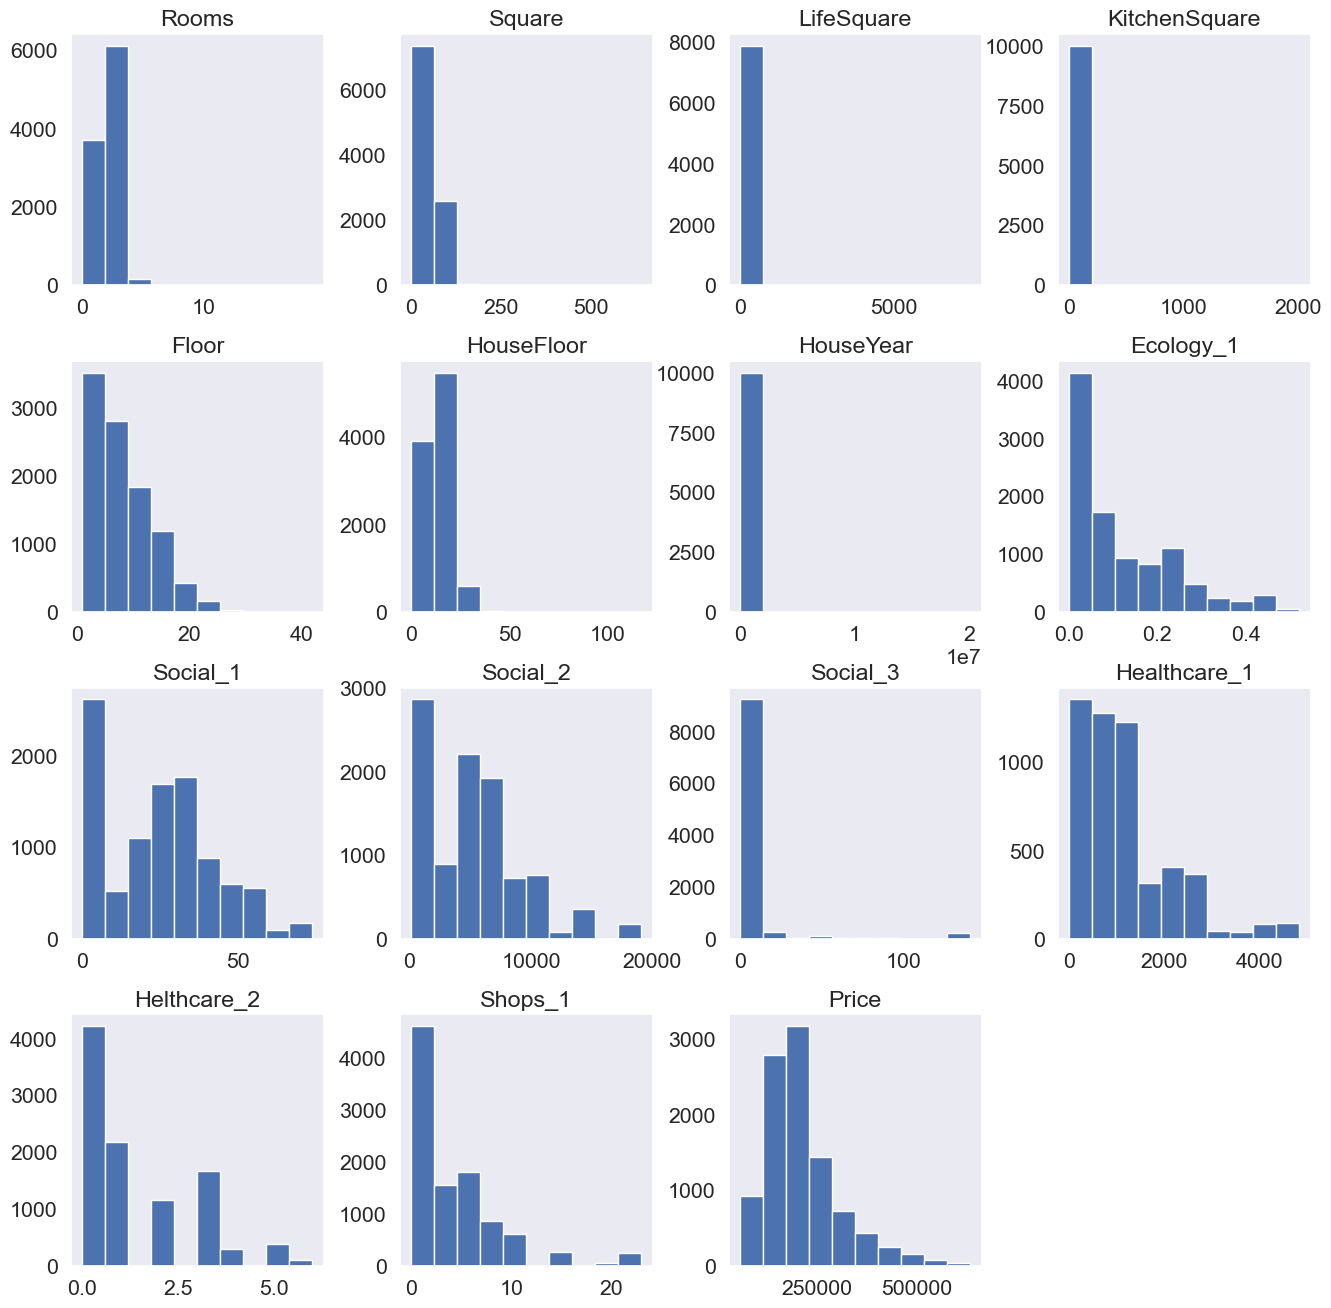

In [76]:
df_train.hist(figsize=(16,16), bins=10, grid=False)


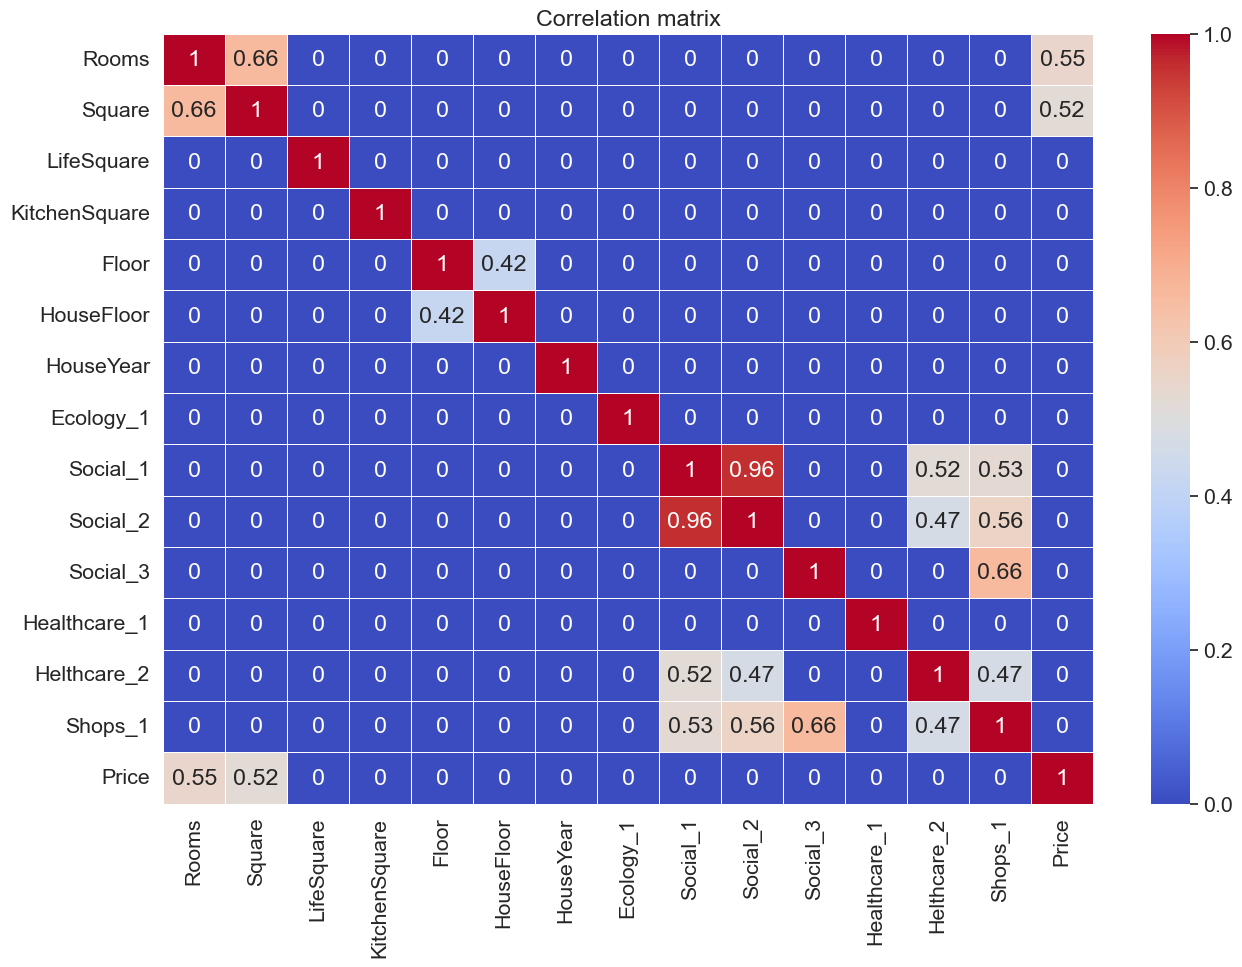

In [77]:
plt.figure(figsize=(15,10))
sns.set(font_scale = 1.4)
corr_matrix = df_train.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix)<0.3] = 0
sns.heatmap(corr_matrix, annot = True, linewidths=.5,cmap = 'coolwarm')
plt.title('Correlation matrix')
plt.show()

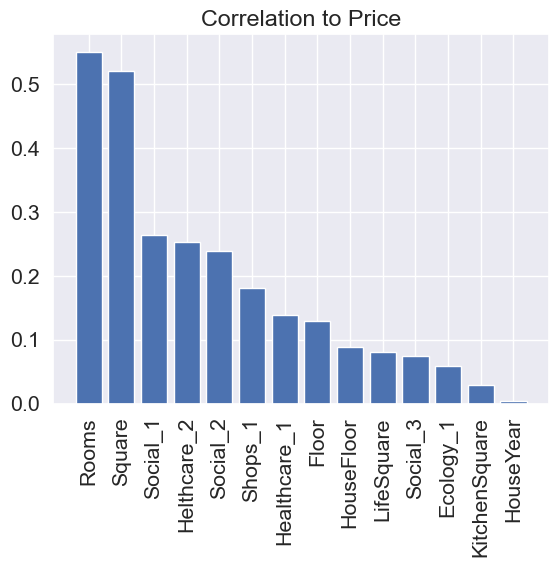

In [78]:
corrmat = df_train.loc[:, df_train.columns != 'Id'].corrwith(df_train['Price']).abs().sort_values(ascending=False)[1:]
plt.bar(corrmat.index, corrmat.values)
plt.title('Correlation to Price')
plt.xticks(rotation='vertical')
plt.show()

In [79]:
df_train.select_dtypes(include='object').columns.tolist()

['Id', 'DistrictId', 'Ecology_2', 'Ecology_3', 'Shops_2']

In [80]:
#признак 'Rooms' имеет некорретные значения
df_train['Rooms'].value_counts()

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

In [81]:
df_train['Rooms_li'] = 0
df_train.loc[(df_train['Rooms'] == 0) | (df_train['Rooms'] >=6),'Rooms_li'] = 1
df_train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Rooms_li
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,...,B,33,7976,5,NaN,0,11,B,184966.930730,0
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,...,B,46,10309,1,240.0,1,16,B,300009.450063,0
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,...,B,34,7759,0,229.0,1,3,B,220925.908524,0
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,...,B,23,5735,3,1084.0,0,5,B,175616.227217,0
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,...,B,35,5776,1,2078.0,2,4,B,150226.531644,0


In [82]:
df_train['Rooms_li'].value_counts()

0    9988
1      12
Name: Rooms_li, dtype: int64

In [83]:

df_train.loc[df_train['Rooms'] == 0,'Rooms'].mode()
df_train.loc[df_train['Rooms'] >= 6,'Rooms'] = df_train['Rooms'].median()

In [84]:
df_train['Rooms'].value_counts()

2.0    3884
1.0    3705
3.0    2235
4.0     150
5.0      18
0.0       8
Name: Rooms, dtype: int64

In [85]:
# признак 'KitchenSquare' так же имеет выбросы ввиде нулевого значения и площади более 120 
df_train['KitchenSquare'].value_counts()

1.0       2460
8.0       1306
5.0       1169
10.0      1075
6.0       1038
9.0        843
0.0        697
7.0        609
12.0       249
11.0       233
13.0        67
14.0        51
4.0         39
15.0        31
3.0         22
16.0        16
20.0        14
17.0        12
19.0        11
18.0         6
2.0          4
22.0         3
32.0         2
41.0         2
51.0         2
30.0         2
112.0        2
37.0         2
43.0         2
25.0         2
58.0         2
84.0         1
75.0         1
21.0         1
54.0         1
62.0         1
40.0         1
29.0         1
1970.0       1
27.0         1
39.0         1
35.0         1
23.0         1
73.0         1
31.0         1
60.0         1
63.0         1
42.0         1
36.0         1
96.0         1
26.0         1
53.0         1
78.0         1
66.0         1
2014.0       1
48.0         1
72.0         1
123.0        1
Name: KitchenSquare, dtype: int64

<Axes: >

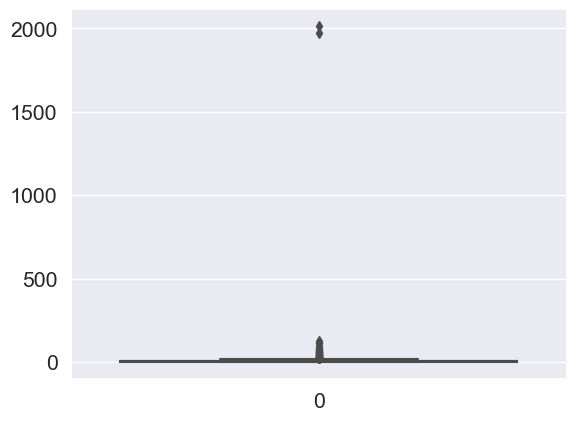

In [86]:
sns.boxplot(df_train.KitchenSquare)

In [87]:
df_train['KitchenSquare'].describe()

count    10000.000000
mean         6.273300
std         28.560917
min          0.000000
25%          1.000000
50%          6.000000
75%          9.000000
max       2014.000000
Name: KitchenSquare, dtype: float64

In [88]:
df_train['KitchenSquare'].quantile(0.975),df_train['KitchenSquare'].quantile(0.025)

(13.0, 0.0)

In [89]:
condition = (df_train['KitchenSquare'].isna()) \
                      | (df_train['KitchenSquare']>df_train['KitchenSquare'].quantile(0.975))
df_train.loc[condition,'KitchenSquare'] = df_train['KitchenSquare'].median()
df_train.loc[df_train['KitchenSquare'] < 3,'KitchenSquare'] = 3

In [90]:
df_train['KitchenSquare'].value_counts()

3.0     3183
8.0     1306
6.0     1227
5.0     1169
10.0    1075
9.0      843
7.0      609
12.0     249
11.0     233
13.0      67
4.0       39
Name: KitchenSquare, dtype: int64

In [91]:
#проверим этажность домов и соответствие с нахожденим на них объектов
df_train['HouseFloor'].sort_values().unique()

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        36.,  37.,  38.,  39.,  40.,  44.,  45.,  47.,  48.,  99., 117.])

In [92]:
df_train['Floor'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 31, 32, 33, 37, 42],
      dtype=int64)

In [93]:
(df_train['Floor']>df_train['HouseFloor']).sum()

1825

In [94]:
df_train['HouseFloor_li'] = 0
df_train.loc[df_train['HouseFloor'] ==0,'HouseFloor_li'] = 1
df_train.loc[df_train['Floor']> df_train['HouseFloor'],'HouseFloor_li'] = 1

In [95]:
df_train.loc[df_train['HouseFloor']==0,'HouseFloor']=df_train['HouseFloor'].median()

In [96]:
floor_li = df_train.loc[df_train['Floor']> df_train['HouseFloor']].index
floor_li

Int64Index([   7,   14,   16,   21,   26,   35,   39,   44,   51,   67,
            ...
            9959, 9962, 9971, 9973, 9975, 9984, 9985, 9989, 9991, 9995],
           dtype='int64', length=1610)

In [97]:
df_train.loc[floor_li,'Floor'] = df_train.loc[floor_li,'HouseFloor']\
                                         .apply(lambda x: random.randint(1,x))

In [98]:
(df_train['Floor'] > df_train['HouseFloor']).sum()

0

In [99]:
df_train['HouseYear'].value_counts(ascending=False)

1977    2652
2017     308
2016     305
2015     299
2014     210
        ... 
4968       1
1914       1
1916       1
1910       1
1928       1
Name: HouseYear, Length: 97, dtype: int64

In [100]:
# год постройки имеет недопустимые значения
df_train.loc[df_train['HouseYear']> 2020,'HouseYear'] = 2020

In [101]:
df_train['HouseYear'].value_counts()

1977    2652
2017     308
2016     305
2015     299
2014     210
        ... 
1914       1
1947       1
1916       1
1910       1
1928       1
Name: HouseYear, Length: 95, dtype: int64

In [102]:
#обработка пропусков
df_train.isna().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
Rooms_li            0
HouseFloor_li       0
dtype: int64

In [103]:
df_train[['Square','LifeSquare','KitchenSquare']].head()

,Square,LifeSquare,KitchenSquare
0,47.981561,29.442751,6.0
1,65.683640,40.049543,8.0
2,44.947953,29.197612,3.0
3,53.352981,52.731512,9.0
4,39.649192,23.776169,7.0


In [104]:
df_train['LifeSquare_nan'] = df_train['LifeSquare'].isna()*1

condition = (df_train['LifeSquare'].isna()) *1\
                  &(~df_train['Square'].isna())\
                  &(~df_train['KitchenSquare'].isna())
df_train.loc[condition,'LifeSquare'] = df_train.loc[condition,'Square']\
                                              - df_train.loc[condition,'KitchenSquare'] 


In [105]:
df_train.head(5)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Rooms_li,HouseFloor_li,LifeSquare_nan
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,...,7976,5,NaN,0,11,B,184966.930730,0,0,0
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,...,10309,1,240.0,1,16,B,300009.450063,0,0,0
2,4765,53,2.0,44.947953,29.197612,3.0,8,12.0,1968,0.049637,...,7759,0,229.0,1,3,B,220925.908524,0,0,0
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,...,5735,3,1084.0,0,5,B,175616.227217,0,0,0
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,...,5776,1,2078.0,2,4,B,150226.531644,0,0,0


In [106]:
import datetime
datetime.datetime.now()

datetime.datetime(2023, 4, 13, 23, 41, 32, 934075)

In [107]:
#подготавливаем параметры для внесения изменений в df_test
from datetime import datetime

class PriceHouses:
    def __init__(self):
        self.median = None
        self.kitchen_square_quantile = None
        
    def fit(self,x):
        self.median = x.median()
        self.kitchen_square_quantile = x['KitchenSquare'].quantile(.975)
        
    def transform(self,x):
     #Rooms   
        x['Rooms_li']= 0
        x.loc[(x['Rooms'] == 0) | (x["Rooms"] >= 6),"Rooms_li"] = 1
        x.loc[x['Rooms'] == 0,'Rooms'] = 1
        x.loc[x['Rooms'] >= 6, 'Rooms'] = self.median['Rooms']
        
    
    # KitchenSquare   
        
        condition = (x['KitchenSquare'].isna()) \
                    | (x['KitchenSquare'] > self.kitchen_square_quantile)
       
        x.loc[condition,'KitchenSquare'] = self.median['KitchenSquare']
        x.loc[x['KitchenSquare'] < 3, 'KitchenSquare'] = 3
    
    # HouseFloor
        
        x['HouseFloor_li'] = 0
        x.loc[x['HouseFloor'] ==0,'HouseFloor_li'] = 1
        x.loc[x['Floor']> x['HouseFloor'],'HouseFloor_li'] = 1
        
        x.loc[x['HouseFloor']==0,'HouseFloor']= self.median['HouseFloor']
        floor_li = x.loc[x['Floor'] > x['HouseFloor']].index
        
        x.loc[floor_li,'Floor'] = x.loc[floor_li,'HouseFloor']\
                                         .apply(lambda x: random.randint(1,x))
        
        # HouseYear

        currient_year = datetime.now().year
        x['HouseYear_outlier'] = 0
        x.loc[x['HouseYear'] > currient_year, 'HouseYear_outlier'] = 1
        #Healthcare_1
        
        if 'Healthcare_1' in x.columns:
            x.drop('Healthcare_1' ,axis = 1, inplace= True)
        
        #LifeSquare  
        
        x['Nan_LifeSquare'] = (x['LifeSquare'].isna()) *1
        condition = (x['LifeSquare'].isna())& \
                       (~x['Square'].isna())& \
                       (~x['KitchenSquare'].isna())
                  
        x.loc[condition,'LifeSquare'] = x.loc[condition,'Square'] - x.loc[condition,'KitchenSquare']

        x.fillna(self.median, inplace = True)

        return x
        

        




In [108]:
binary_to_namber = {'A':0,'B':1}
df_train['Ecology_2'] = df_train['Ecology_2'].replace(binary_to_namber)
df_train['Ecology_3'] = df_train['Ecology_3'].replace(binary_to_namber)
df_train['Shops_2'] = df_train['Shops_2'].replace(binary_to_namber)


In [109]:
district_size = df_train['DistrictId'].value_counts().reset_index()\
        .rename(columns={'index':'DistrictId','DistrictId':'DistrictidSize'})
district_size.head(5)


,DistrictId,DistrictidSize
0,27,851
1,1,652
2,23,565
3,6,511
4,9,294


In [110]:
df_train = df_train.merge(district_size,on='DistrictId',how='left')
df_train.head(3)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Rooms_li,HouseFloor_li,LifeSquare_nan,DistrictidSize
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,...,5,NaN,0,11,1,184966.930730,0,0,0,22
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,...,1,240.0,1,16,1,300009.450063,0,0,0,87
2,4765,53,2.0,44.947953,29.197612,3.0,8,12.0,1968,0.049637,...,0,229.0,1,3,1,220925.908524,0,0,0,174


In [111]:
df_train['IsDistrictLarge'] =(df_train['DistrictidSize']> 100).astype(int)


In [112]:

med_prise_by_district = df_train.groupby(['DistrictId','Rooms'],as_index=False).agg({'Price':'median'})\
                                         .rename(columns={'Price':'MedPriceByDictrict'})
med_prise_by_district.head()

,DistrictId,Rooms,MedPriceByDictrict
0,0,1.0,142799.434052
1,0,2.0,176210.812334
2,0,3.0,300610.359425
3,1,1.0,146735.671740
4,1,2.0,202666.310126


In [140]:
df_train = df_train.merge(med_prise_by_district ,on=['DistrictId','Rooms'],how="left")
df_train.head(3)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Rooms_li,HouseFloor_li,LifeSquare_nan,DistrictidSize,IsDistrictLarge,MedPriceByDictrict_x,floor_cat,year_cat,MedPriseByFloorYear,MedPriceByDictrict_y
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,...,0,0,0,22,0,207786.135836,2,3,190999.457618,207786.135836
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,...,0,0,0,87,0,300009.450063,2,3,190999.457618,300009.450063
2,4765,53,2.0,44.947953,29.197612,3.0,8,12.0,1968,0.049637,...,0,0,0,174,1,263206.223152,2,3,190999.457618,263206.223152


In [114]:
def floor_to_cat(x):
    x['floor_cat']=0

    x.loc[x['Floor']<=2,'floor_cat']=1
    x.loc[(x['Floor']>2) & (x['Floor'] <=15),'floor_cat']=2
    x.loc[x['Floor']>15,'floor_cat']=3

    return x

def year_to_cat(x):
    x['year_cat']=0
    x.loc[x['HouseYear']<=1941,'year_cat']=1
    x.loc[(x['HouseYear']>1941) & (x['HouseYear'] <=1960),'year_cat']=2
    x.loc[(x['HouseYear']>1961) & (x['HouseYear'] <=1980),'year_cat']=3
    x.loc[(x['HouseYear']>1981) & (x['HouseYear'] <=2000),'year_cat']=3
    x.loc[(x['HouseYear']>2001) & (x['HouseYear'] <=2010),'year_cat']=4
    x.loc[x['HouseYear']>2010,'year_cat']=5
    
    
    return x




In [115]:
df_train = floor_to_cat(df_train)
df_train = year_to_cat(df_train)
df_train.head(3)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Shops_2,Price,Rooms_li,HouseFloor_li,LifeSquare_nan,DistrictidSize,IsDistrictLarge,MedPriceByDictrict,floor_cat,year_cat
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,...,1,184966.930730,0,0,0,22,0,207786.135836,2,3
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,...,1,300009.450063,0,0,0,87,0,300009.450063,2,3
2,4765,53,2.0,44.947953,29.197612,3.0,8,12.0,1968,0.049637,...,1,220925.908524,0,0,0,174,1,263206.223152,2,3


In [126]:
med_prise_by_floor_year=df_train.groupby(['year_cat','floor_cat'],as_index=False).agg({'Price':'median'})\
                                         .rename(columns={'Price':'MedPriseByFloorYear'})
med_prise_by_floor_year.head()
                                         

,year_cat,floor_cat,MedPriseByFloorYear
0,0,1,211303.751870
1,0,2,220719.575850
2,0,3,258194.395734
3,1,1,304995.083464
4,1,2,362698.813373


In [117]:
df_train = df_train.merge(med_prise_by_floor_year ,on=['year_cat','floor_cat'],how="left")
df_train.head(3)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Price,Rooms_li,HouseFloor_li,LifeSquare_nan,DistrictidSize,IsDistrictLarge,MedPriceByDictrict,floor_cat,year_cat,MedPriseByFloorYear
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,...,184966.930730,0,0,0,22,0,207786.135836,2,3,190999.457618
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,...,300009.450063,0,0,0,87,0,300009.450063,2,3,190999.457618
2,4765,53,2.0,44.947953,29.197612,3.0,8,12.0,1968,0.049637,...,220925.908524,0,0,0,174,1,263206.223152,2,3,190999.457618


In [118]:
import copy

In [144]:
class FeatureGenetator():
    def __init__(self):
        self.DistrictId_count = None
        self.binary_to_namber = None
        self.med_prise_by_district = None
        self.med_prise_by_floor_year = None
        self.house_year_max = None
        self.floor_max = None
        self.district_size = None
       
        
    def fit(self, x, y = None):
        
        x=x.copy()
        

    #бинарные признаки
        self.binary_to_namber = {'A':0,'B':1}
    
    #районы
        self.district_size = x['DistrictId'].value_counts().reset_index().rename(columns={'index': 'DistrictId','DistrictId':'DistrictSize'}) 
        df=x.copy()
    

        if y is not None:
            df['Price'] = y.values

            self.med_prise_by_district = df.groupby(['DistrictId','Rooms'],as_index=False).agg({'Price':'median'})\
                                         .rename(columns={'Price':'MedPriceByDictrict'})
            self.med_prise_by_district_median = self.med_prise_by_district['MedPriceByDictrict'].median

        #этажность,год постройки
        if y is not None:
            self.floor_max = df['Floor'].max()
            self.house_year_max = df['HouseYear'].max()
            df['Price'] = y.values
            df = self.floor_to_cat(df)
            df = self.year_to_cat(df)
            self.med_prise_by_floor_year =df.groupby(['year_cat','floor_cat'],as_index=False).agg({'Price':'median'})\
                                         .rename(columns={'Price':'MedPriseByFloorYear'})
            self.med_prise_by_floor_year_median = self.med_prise_by_floor_year['MedPriseByFloorYear'].median()
    def transform(self,x):
        x['Ecology_2'] = x['Ecology_2'].map(self.binary_to_namber)
        x['Ecology_3'] = x['Ecology_3'].map(self.binary_to_namber)
        x['Shops_2'] = x['Shops_2'].map(self.binary_to_namber)
        x = x.merge(self.district_size,on='DistrictId',how='left')
        x['new_district']=0
        x.loc[x["DistrictSize"].isna(),'new_district']=1
        
        x['DistrictSize'].fillna(5,inplace=True)
        
        x['DistrictLarge']=(x['DistrictSize']>100).astype(int)

        x = self.floor_to_cat(x)
        x = self.year_to_cat(x)
#таргет
        #if self.med_prise_by_district is not None:
         #   x = x.merge(med_prise_by_district ,on=['DistrictId','Rooms'],how="left")
         #   x.fillna(self.med_prise_by_district_median,inplace=True)
        
        if self.med_prise_by_floor_year is not None:
            x = x.merge(med_prise_by_floor_year ,on=['year_cat','floor_cat'],how="left")
            x.fillna(self.med_prise_by_floor_year_median,inplace=True)

        return x
    def floor_to_cat(self,x):
        bins = [0,3,5,9,15,self.floor_max]
        x['floor_cat'] = pd.cut(x["Floor"],bins=bins,labels=False)
        x['floor_cat'].fillna(-1, inplace = True)
        return x
    def year_to_cat(self,x):
        bins = [0,1941,1945,1980,2000,2010,self.house_year_max]
        x["year_cat"] = pd.cut(x["HouseYear"],bins=bins,labels=False) 
        x['year_cat'].fillna(-1, inplace = True)

        return x

In [120]:
#разбиение на train и test
train_df = pd.read_csv(DATA_TRAIN_PATH)
test_df = pd.read_csv(DATA_TEST_PATH)

In [121]:
target_name = 'Price'

In [122]:
x = train_df.drop(columns=target_name)
y = train_df[target_name]

In [123]:
x_train,x_valid,y_train,y_valid = train_test_split(x,y,test_size=0.33,shuffle=True,random_state=42)

In [124]:
preprocessor = PriceHouses()
preprocessor.fit(x_train)

x_train = preprocessor.transform(x_train)
x_valid = preprocessor.transform(x_valid)
test_df = preprocessor.transform(test_df)

x_train.shape, x_valid.shape,test_df.shape

((6700, 22), (3300, 22), (5000, 22))

In [145]:
fetures_gen = FeatureGenetator()
fetures_gen.fit(x_train,y_train)

x_train = fetures_gen.transform(x_train)
x_valid = fetures_gen.transform(x_valid)
test_df = fetures_gen.transform(test_df)

x_train.shape,x_valid.shape,test_df.shape

((6700, 28), (3300, 28), (5000, 28))

In [146]:
rf_model = RandomForestRegressor(random_state=21,criterion='squared_error')
rf_model.fit(x_train,y_train)

RandomForestRegressor(random_state=21)

Train R2:	0.964
Test R2:	0.717


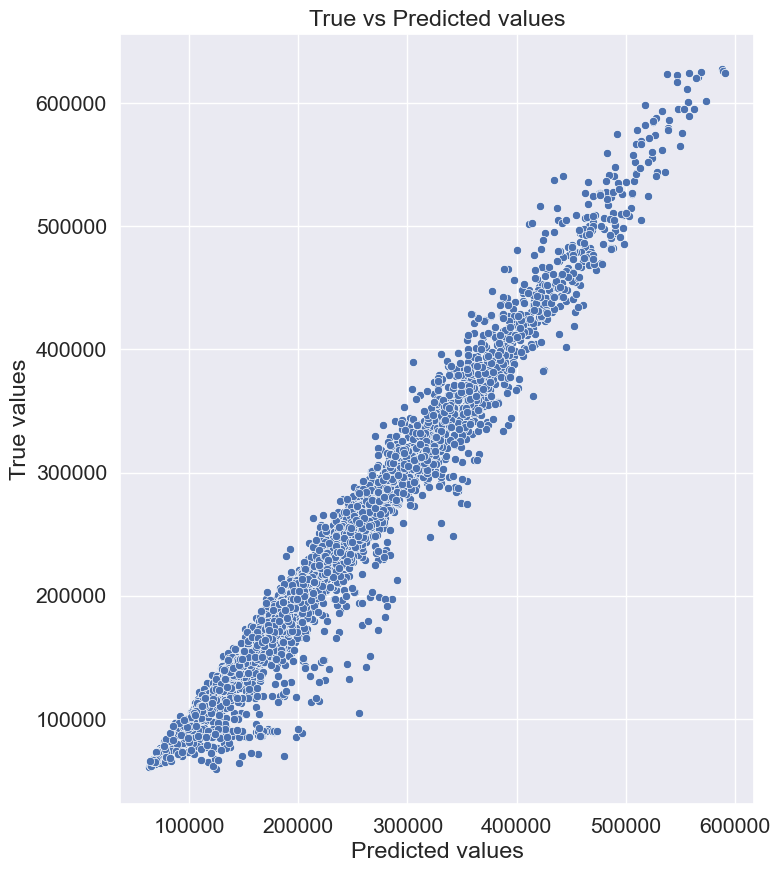

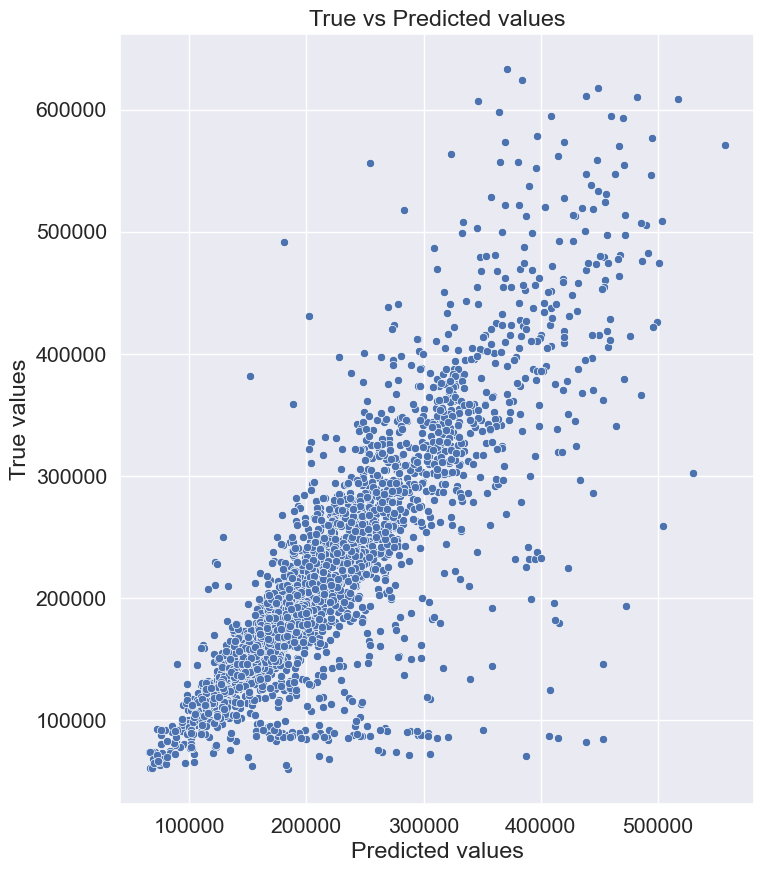

In [151]:
y_train_preds = rf_model.predict(x_train)
y_test_preds = rf_model.predict(x_valid)

evaluate_preds(y_train,y_train_preds,y_valid,y_test_preds)

In [153]:
#Кросс-валидация
cv_score = cross_val_score(rf_model,x_train,y_train,scoring="r2",cv=KFold(n_splits=3,shuffle=True,random_state=21))
cv_score

array([0.73789942, 0.71195528, 0.73063504])

In [154]:
cv_score.mean()

0.726829914069758

In [155]:
test_df.shape

(5000, 28)

In [172]:
submit = pd.read_csv("rf_submit.csv")
submit.head(5)

,Id,Price
0,4567,166554.678437
1,5925,122755.776092
2,960,139498.325576
3,3848,171556.304365
4,746,174932.891730


In [170]:
predictions = rf_model.predict(test_df)
predictions

array([156433.66162693, 211519.6265951 , 214809.81654231, ...,
       291374.99582733, 189419.73115853, 177379.02717239])

In [173]:
submit.to_csv("rf_submit_1.scv",index=False)

In [176]:
with open("rf_final_model","wb") as file:
    pickle.dump(rf_model,file)

In [177]:
with open("preprocessor_model","wb") as file:
    pickle.dump(preprocessor,file)